<a href="https://colab.research.google.com/github/lmuther8/movieReviewAnalysis/blob/main/movie_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting to G Drive**

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/


Mounted at /gdrive
/gdrive


In [ ]:
%cd MyDrive/ProgrammingHumanity/

/gdrive/MyDrive/ProgrammingHumanity


In [ ]:
%ls

movie/  movie_test/


### Change here for test or all files

In [ ]:
%cd movie/

# %cd movie_test/

# %cd ../movie/

/gdrive/MyDrive/ProgrammingHumanity/movie


# **Making Soup and looping through files**

In [ ]:
!pip install cchardet
!pip install contractions
!pip install texthero

     |████████████████████████████████| 263 kB 5.5 MB/s 
     |████████████████████████████████| 284 kB 5.2 MB/s 
     |████████████████████████████████| 321 kB 35.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=fede40a691239ed90c0357690b806462d735c977f999aee05cac95050bbdf04e
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
     |████████████████████████████████| 235 kB 7.6 MB/s 
     |████████████████████████████████| 1.5 MB 33.8 MB/s 
     |████████████████████████████████| 749 kB 48.2 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import os
mypath = %pwd

from bs4 import BeautifulSoup
import lxml
import cchardet
import re
import texthero as hero
import pandas as pd
hero.get_default_pipeline()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[<function texthero.preprocessing.fillna>,
 <function texthero.preprocessing.lowercase>,
 <function texthero.preprocessing.remove_digits>,
 <function texthero.preprocessing.remove_punctuation>,
 <function texthero.preprocessing.remove_diacritics>,
 <function texthero.preprocessing.remove_stopwords>,
 <function texthero.preprocessing.remove_whitespace>]

In [ ]:
files = os.listdir(mypath)
# print(len(files))

null_data_string = "no data"
error_log = []

years_ls = []
raw_reviews_ls = []

regex_year = '19\d{2}|20\d{2}'
#regex_year = '\((19\d{2})|\((20\d{2})'

In [ ]:
for filename in files:
  with open(filename, 'r') as f:
    try:
      soup = BeautifulSoup(f, 'lxml')
      title = str(soup.find_all("title"))
      year = re.findall(regex_year, title)
      if len(year[0]) == 4:
        years_ls.append(year[0])
      else:
        years_ls.append(null_data_string)
      review = soup.find_all('p')[: -2 or None]
      review = ''.join([x.text for x in review])
      if review:
        raw_reviews_ls.append(review)
      else:
        raw_reviews_ls.append(null_data_string)
    except UnicodeDecodeError:
      error_log.append(filename)
    except:
      print("Some other error")



Some other error
Some other error
Some other error
Some other error
Some other error
Some other error
Some other error
Some other error
Some other error
Some other error


In [ ]:
review_df = pd.DataFrame({'year':years_ls,'review_raw': raw_reviews_ls})

In [ ]:
review_df.shape

(21694, 2)

In [ ]:
review_df['review_clean'] = hero.clean(review_df['review_raw'])
review_df

,year,review_raw,review_clean
0,2001,CAPSULE: This very dark sci-fi fantasy is ...,capsule dark sci fi fantasy magnificent visual...
1,2001,Aliens beings have taken over the Earth. The g...,aliens beings taken earth great cities deserte...
2,2001,"Susan Granger's review of ""THE SCORE"" (Paramou...",susan granger review score paramount pictures ...
3,2000,"Susan Granger's review of ""BIG EDEN"" (Jour de ...",susan granger review big eden jour de fete uto...
4,2001,The Fast and The Furious (2001)\nReviewed by S...,fast furious reviewed steve kong reviews ultra...
...,...,...,...
21689,1991,CLOSET LAND is a movie written and direct...,closet land movie written directed radha bhara...
21690,1991,An artist painting a picture has the opti...,artist painting picture option reproducing exa...
21691,1991,I wrote this title after seeing THE DOORS...,wrote title seeing doors europe documentary or...
21692,1991,"First of all, let's get one thing straigh...",first let get one thing straight martial arts ...


# **Vader Time**

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
review_df['vader'] = review_df['review_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
#review_df['vader_raw'] = review_df['review_raw'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])


# **TextBlob**

In [ ]:
from textblob import TextBlob

In [ ]:
review_df['textblob'] = review_df['review_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [ ]:
review_df
neg_df

,year,review_raw,review_clean,textblob
10,2001,"You can say this much for POOTIE TANG, written...",say much pootie tang written directed louis c ...,-0.070833
29,2001,"Susan Granger's review of ""AMERICA'S SWEETHEAR...",susan granger review america sweethearts colum...,-0.025309
32,2001,Reviewed by Harvey Karten\n Dimension Films\n...,reviewed harvey karten dimension films directo...,-0.005486
71,2000,Yakuza tough guy Yamamoto (Beat Takeshi) is fo...,yakuza tough guy yamamoto beat takeshi forced ...,-0.015280
102,2001,Have you ever wondered what goes on in the bac...,ever wondered goes back nose sneeze farrelly b...,-0.015969
...,...,...,...,...
21592,1989,One of the most entertaining and imaginat...,one entertaining imaginative movies seen quite...,-0.010971
21611,1987,Synopsis:\nA trilogy of unusual stories set in...,synopsis trilogy unusual stories set slums mod...,-0.003695
21628,1990,With the world celebrating the 100th anni...,world celebrating 100th anniversary vincent va...,-0.016009
21656,1988,"Have you ever gone to a public place, lik...",ever gone public place like shopping centre po...,-0.142424


# **Grouping Data**

In [ ]:
import numpy as np

In [ ]:
pos_df = review_df[review_df['textblob']>0]
neg_df = review_df[review_df['textblob']<0]

In [ ]:
def merge(df):
  count_df = df.count()['review_raw'].to_frame().reset_index().rename(columns={"review_raw": "review count"})  
  vader_df = df['vader'].agg(np.mean).to_frame(name = "avg vader").reset_index()
  text_blob_df = df['textblob'].agg(np.mean).to_frame(name = "avg textblob").reset_index()
  review_text_df = df['review_clean'].agg(lambda x: ' '.join(x)).to_frame(name = "all reviews").reset_index()

  grouped_df = pd.merge(count_df, vader_df, on="year")
  grouped_df = pd.merge(grouped_df, text_blob_df, on="year")
  grouped_df = pd.merge(grouped_df, review_text_df, on="year")
  
  return grouped_df

In [ ]:
years_groups = review_df.groupby('year')
pos_years_groups = pos_df.groupby('year')
neg_years_groups = neg_df.groupby('year')
grouped_df = merge(years_groups)
pos_grouped_df = merge(pos_years_groups)
neg_grouped_df = merge(neg_years_groups)

,year,pos review count
0,1910,1
1,1915,1
2,1920,3
3,1921,1
4,1922,3
...,...,...
81,1999,2869
82,2000,1827
83,2001,662
84,2010,2


In [ ]:
pos_count_df = pos_years_groups.count()['review_raw'].to_frame().reset_index().rename(columns={"review_raw": "pos review count"})  
grouped_df = pd.merge(grouped_df, pos_count_df, on="year")
grouped_df['% positive'] = grouped_df['pos review count']/grouped_df['review count']
grouped_df

,year,review count,avg vader,avg textblob,all reviews,pos review count,% positive
0,1910,1,0.932400,0.097490,back thomas edison pioneer american film indus...,1,1.000000
1,1915,1,0.381800,0.131824,birth nation considered first great silent fil...,1,1.000000
2,1920,4,-0.047675,0.055577,make movies like used common expression would ...,3,0.750000
3,1921,1,0.977100,0.067755,three musketeers silent film starring douglas ...,1,1.000000
4,1922,3,0.963200,0.135277,age early silent feature apparent company cred...,3,1.000000
...,...,...,...,...,...,...,...
81,1999,3205,0.558682,0.096985,director takashi miike writer daisuke tengan s...,2869,0.895164
82,2000,2024,0.605110,0.099483,susan granger review big eden jour de fete uto...,1827,0.902668
83,2001,740,0.619470,0.093389,capsule dark sci fi fantasy magnificent visual...,662,0.894595
84,2010,2,0.093000,0.105716,starring roy scheider john lithgow helen mirre...,2,1.000000


In [ ]:
my_cutoff_number = 20;

filtered_df_plotting = grouped_df[grouped_df["review count"]>my_cutoff_number]
filtered_df_analysis = grouped_df[grouped_df["review count"]>my_cutoff_number].set_index("year")

print(grouped_df.shape)
print(filtered_df_plotting.shape)
filtered_df_plotting.head()

(86, 7)
(53, 7)


,year,review count,avg vader,avg textblob,all reviews,pos review count,% positive
21,1939,21,0.897252,0.201991,gone wind grand majestic love story last years...,21,1.000000
24,1942,23,0.979470,0.197030,thanks unwritten dogmas political correctness ...,23,1.000000
28,1946,22,0.711227,0.173667,orson welles tried many years get hollywood fi...,20,0.909091
31,1949,23,0.557687,0.143014,town rated running time minutes genre musical ...,21,0.913043
33,1951,22,0.861395,0.160638,american paris rated running time minutes genr...,21,0.954545


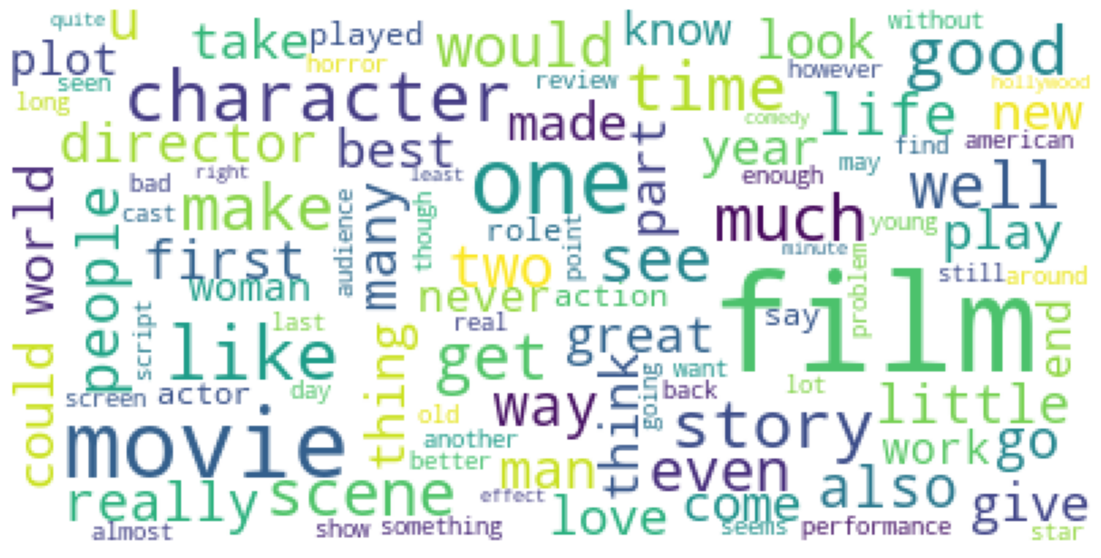

In [ ]:
new_dict = data = dict(zip(freq['word'].tolist(), freq['frequency'].tolist()))
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(frequencies=new_dict)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# **Word Counting**

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
from wordcloud import WordCloud



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def word_frequency(input_string):
  # creates tokens, creates lower class, removes numbers and lemmatizes the words
  new_tokens = word_tokenize(input_string)
  new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
  #counts the words, pairs and trigrams
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  #creates 3 data frames and returns thems
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['Pairs','Frequency']).sort_values(by='Frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq, word_pairs, trigrams

In [ ]:
freq, pairs, tri = word_frequency(filtered_df_analysis.loc["1992","all reviews"])

In [ ]:
freq.head(15)

,word,frequency
52,film,4438
2,movie,1733
34,one,1674
256,like,962
251,character,904
272,good,850
243,time,835
260,story,827
271,scene,755
559,get,754


In [ ]:
freq2, pairs2, tri2 = word_frequency(filtered_df_analysis.loc["1995","all reviews"])

In [ ]:
filtered_pairs2 = pairs2.drop([1428,57175, 116693, 116694, 116692,56886, 594, 1437])

filtered_pairs2.head(15)

,Pairs,Frequency
732,"(year, old)",201
1276,"(new, york)",182
6705,"(motion, picture)",172
1927,"(look, like)",168
951,"(bad, guy)",161
4253,"(die, hard)",152
3275,"(special, effect)",137
55402,"(mine, meant)",133
55403,"(meant, reflect)",133
55404,"(reflect, employer)",133


# **Plotting** 

In [ ]:
!pip install norm

In [ ]:
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (20,10)

SMALL_SIZE = 15
MEDIUM_SIZE = 30
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

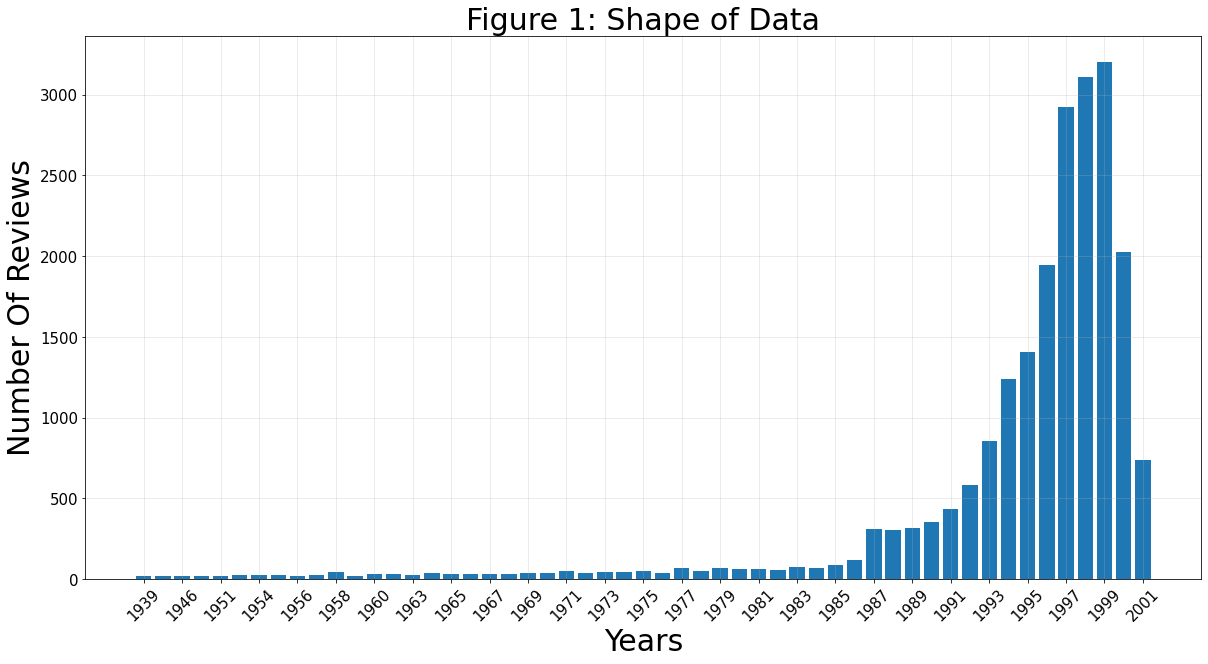

In [ ]:
plt.bar(filtered_df_plotting["year"], filtered_df_plotting["review count"])

plt.xticks(filtered_df_plotting["year"][::2], rotation = 45)
plt.title("Figure 1: Shape of Data")
plt.ylabel("Number Of Reviews")
plt.xlabel("Years")
plt.grid(True, alpha=0.3)
plt.show()

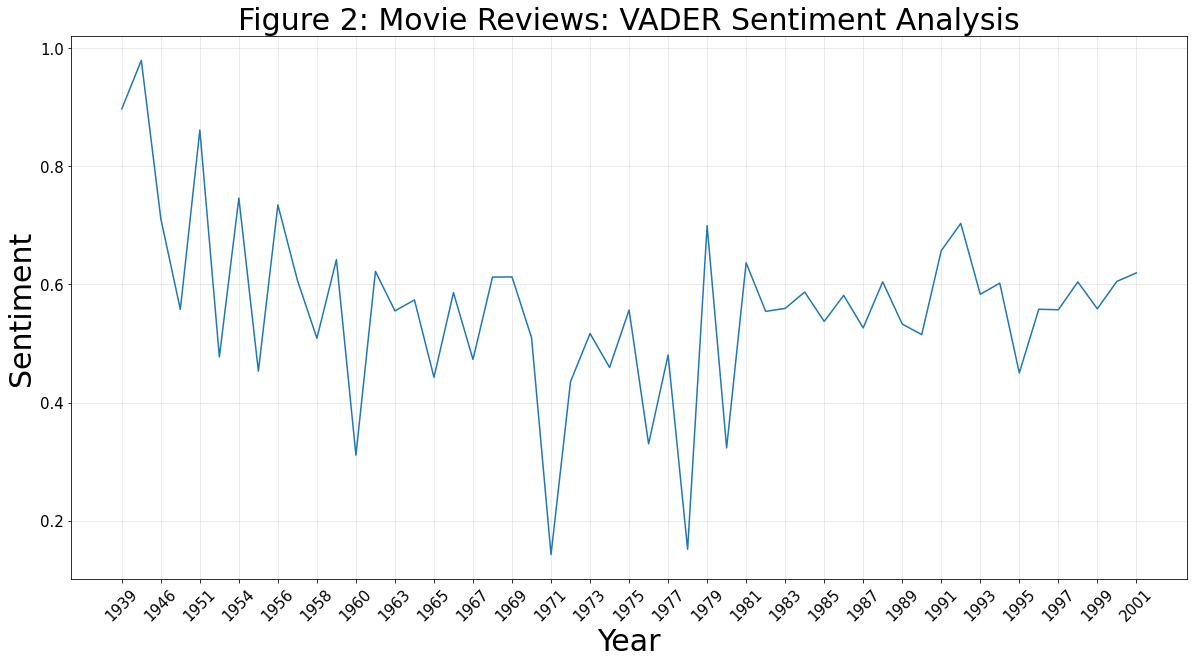

In [ ]:
plt.plot(filtered_df_plotting['year'],filtered_df_plotting['avg vader'])

#plt.plot(filtered_df_plotting['year'],filtered_df_plotting['avg textblob'])

plt.title('Figure 2: Movie Reviews: VADER Sentiment Analysis')
plt.ylabel('Sentiment')
plt.xlabel('Year')
plt.xticks(filtered_df_plotting["year"][::2], rotation = 45)
plt.grid(True, alpha=0.3)

plt.show()

# **References**


[Making soup faster](https://thehftguy.com/2020/07/28/making-beautifulsoup-parsing-10-times-faster/)

[Data source](https://www.cs.cornell.edu/people/pabo/movie-review-data/)

